In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Datasets/SkewOutliersMulticorr')

In [3]:
data.head()
# data.shape

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
0,29.0,57,18,0.00,65.7000,3.4,7.6,1.3,0.5,0
1,29.0,61,13,1.25,64.4000,4.1,7.6,1.0,0.4,0
2,26.0,82,22,1.25,47.7375,2.5,7.1,0.3,0.1,0
3,25.0,89,13,1.25,47.7375,1.3,6.9,0.0,0.0,0
4,27.0,77,16,0.00,64.8000,3.0,14.2,1.2,0.5,0


#### Taking x and y values:

In [4]:
x = data.drop(['FWI', 'Classes'], axis=1)

In [5]:
y = data['FWI']

In [6]:
print(x.shape)
print(y.shape)

(244, 8)
(244,)


#### Train-Test split():

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [8]:
x_train.shape

(170, 8)

#### Feature Scaling:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
x_train = scaler.fit_transform(x_train)

In [11]:
x_test = scaler.transform(x_test)

In [12]:
import pickle
pickle.dump(scaler, open('Features_Scaled.pkl', 'wb'))

### Regression Models:

#### Linear Regression:

In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

#### Ridge Regression:


In [14]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

#### Lasso Regression:

In [15]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

#### KNN Regression:

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

#### SVM Regressor:

In [17]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

#### Decision Tree Regression:

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

#### Random Forest:

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

#### Gradient Boost:

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model = GradientBoostingRegressor()
grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

#### List of Models Performance:

In [21]:
models = [linear_model, ridge_model, lasso_model, knn_model, svm_model, tree_model, rf_model, grad_model]

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error

In [23]:
for model in models:
    y_pred = model.predict(x_test)
    r2score = r2_score(y_test, y_pred)
    adj_r2 = (1-(1-r2score)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
    mae = mean_absolute_error(y_test, y_pred)
    modelName = str(model)[:-2]
    print(f"{modelName:25}: R2={r2score*100:.4f} | Adj_R2={adj_r2*100:.4f} | MAE={mae:.4f}")

LinearRegression         : R2=96.1763 | Adj_R2=95.7056 | MAE=0.6393
Ridge                    : R2=96.1545 | Adj_R2=95.6812 | MAE=0.6471
Lasso                    : R2=92.4033 | Adj_R2=91.4683 | MAE=1.2935
KNeighborsRegressor      : R2=92.9400 | Adj_R2=92.0711 | MAE=1.1195
SVR                      : R2=83.5008 | Adj_R2=81.4702 | MAE=1.5101
DecisionTreeRegressor    : R2=95.7019 | Adj_R2=95.1729 | MAE=0.8674
RandomForestRegressor    : R2=96.2455 | Adj_R2=95.7834 | MAE=0.7178
GradientBoostingRegressor: R2=97.0357 | Adj_R2=96.6709 | MAE=0.6934


### Hyper-Parameter Tuning :

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

rf_model = RandomForestRegressor()
rf_Grid = GridSearchCV(rf_model, param_grid, cv = 10, verbose=2, n_jobs = -1)
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                        110, 120],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 3, 4],
                          'min_samples_split': [2, 6, 10],
                          'n_estimators': [5, 20, 50, 100]}],
             verbose=2)

In [36]:
best_grid_model = rf_Grid.best_estimator_
best_grid_model

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt')

In [37]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
rf_Grid.best_score_

0.9772278551157456

In [39]:
y_pred = best_grid_model.predict(x_test)

In [40]:
r2score = r2_score(y_test, y_pred)
adj_r2 = (1-(1-r2score)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
mae = mean_absolute_error(y_test, y_pred)
print(f"Tuned Random Forest: R2={r2score*100:.4f} | Adj_R2={adj_r2*100:.4f} | MAE={mae:.4f}")

Tuned Random Forest: R2=95.8302 | Adj_R2=95.3169 | MAE=0.8612


### Exporting Pickle File:

In [41]:
import pickle
pickle.dump(best_grid_model, open('Regression.pkl', 'wb'))

#### Checking Feature Importance:

In [42]:
feature_significance = rf_Grid.best_estimator_.feature_importances_

In [43]:
df_features = pd.DataFrame({'Feature': data.columns[:-2], 
                            'Importance': feature_significance*100}).sort_values('Importance', ascending=False)

In [44]:
df_features

,Feature,Importance
7,ISI,34.655549
4,FFMC,23.629822
5,DMC,16.855279
6,DC,12.464324
3,Rain,4.632542
1,RH,4.495071
0,Temperature,2.406907
2,Ws,0.860505


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

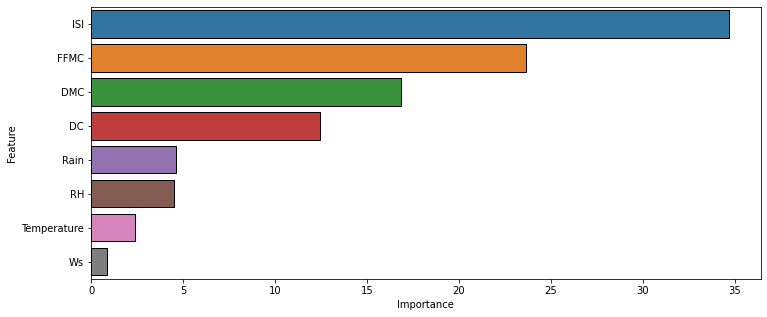

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_features, x='Importance', y='Feature',ec = 'black')